# Movie Reviews dataset
                                                                                  -  Shivakumar Jayaraman(KJ04412)
                                                                                  -  Thulasi Gabbita(NU01134)
## Introduction
As part of Data-602 final, we are performing semi-supervised learning on the given movie reviews dataset, containing a single column that is the review of a movie.

Training Dataset:
https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_train.csv

Dataset with labels for semi-supervised learning:
https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/y_train.csv


Production dataset: 
https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_final.csv
https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/y_final.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

## Data Importing

In [2]:

X_train_df = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_train.csv")
X_train_df

,review
0,"Shame, is a Swedish film in Swedish with Engli..."
1,I know it's rather unfair to comment on a movi...
2,"""Bread"" very sharply skewers the conventions o..."
3,After reading tons of good reviews about this ...
4,During the Civil war a wounded union soldier h...
...,...
39995,"As a Pagan, I must say this movie has little i..."
39996,A lot of the comments seem to treat this film ...
39997,I've only seen most of the series since I leav...
39998,"The ""all I have is 5 dollars and my wedding ri..."


In [3]:
df_y= pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/y_train.csv")
df_y

,sentiment
0,1
1,0
2,1
3,1
4,1
...,...
39995,1
39996,1
39997,0
39998,1


In [4]:
X_final = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_final.csv')
X_final

,review
0,I first saw Heimat 2 on BBC2 in the 90's when ...
1,"I sat down to watch ""Midnight Cowboy"" thinking..."
2,I can never fathom why people take time to rev...
3,"With that line starts one silly, boring Britis..."
4,"Here's the spoiler: At the end of the movie, a..."
...,...
9995,"""Protocol"" is a hit-and-miss picture starring ..."
9996,"In the same vein as Natural Born Killers, anot..."
9997,"A sadly inferior precursor to ""Who's Afraid of..."
9998,"a real hoot, unintentionally. sidney portier's..."


In [5]:
y_final = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/y_final.csv")
y_final

,sentiment
0,1
1,1
2,1
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,0


In [6]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


In [7]:
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

In [8]:
X_train_df['word_count_before_processing'] = X_train_df['review'].apply(no_of_words)
X_train_df.head()

,review,word_count_before_processing
0,"Shame, is a Swedish film in Swedish with Engli...",320
1,I know it's rather unfair to comment on a movi...,129
2,"""Bread"" very sharply skewers the conventions o...",72
3,After reading tons of good reviews about this ...,225
4,During the Civil war a wounded union soldier h...,445


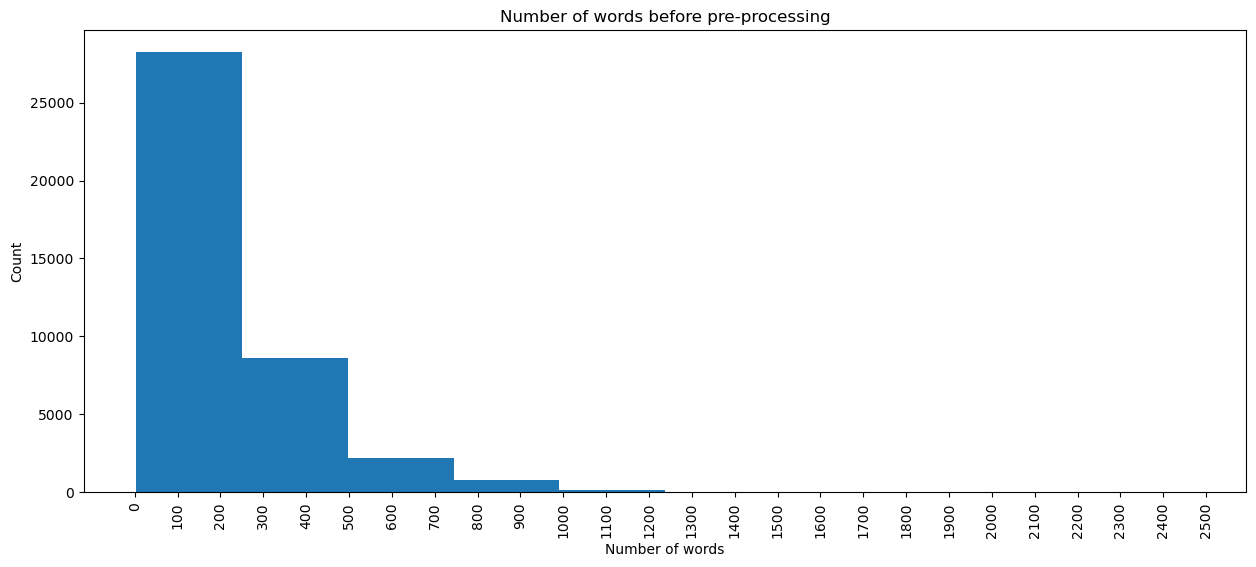

In [9]:
plt.figure(figsize=(15,6))
plt.xticks(np.arange(0,5000,100))
plt.xticks(rotation=90)
plt.hist(X_train_df['word_count_before_processing'])
plt.title('Number of words before pre-processing')
plt.xlabel('Number of words')
plt.ylabel('Count')
plt.show()

In [10]:
X_train_df.describe()

,word_count_before_processing
count,40000.000000
mean,230.402450
std,170.817698
min,4.000000
25%,126.000000
50%,173.000000
75%,279.000000
max,2470.000000


In [11]:
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words

C:\Users\blahb\anaconda3\lib\site-packages\spacy\util.py:887: UserWarning: [W095] Model 'en_core_web_sm' (3.3.0) was trained with spaCy v3.3 and may not be 100% compatible with the current version (3.5.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


## Data Cleaning

In [12]:
# Clean the review string body
def processing_text(text):
    text = text.lower()
    text = re.sub('<br />', '', text) # Remove break tags     
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # Remove urls from input text  
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # Remove all characters except letters and numbers
    return text
   

In [13]:

X_train_df['processed_review'] = X_train_df['review'].apply(processing_text)


## Stop word removal

In [14]:
def remove_stop_words(text):
    words = text.split(" ") 
    cleaned_text = " ".join(w for w in words if w not in stop_words)
    return cleaned_text

In [15]:
X_train_df['processed_review'] = X_train_df['processed_review'].apply(remove_stop_words)

## Lemmatization

In [16]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc]) # lemmatize sentence
    return lemmatized_text

In [17]:
X_train_df['processed_review'] = X_train_df['processed_review'].apply(lemmatize_text)

In [18]:
X_train_df.head(5)

,review,word_count_before_processing,processed_review
0,"Shame, is a Swedish film in Swedish with Engli...",320,shame swedish film swedish english subtitle fi...
1,I know it's rather unfair to comment on a movi...,129,know unfair comment movie see complete piece ...
2,"""Bread"" very sharply skewers the conventions o...",72,bread sharply skewer convention horror movie g...
3,After reading tons of good reviews about this ...,225,read ton good review movie decide spin buy dvd...
4,During the Civil war a wounded union soldier h...,445,civil war wound union soldier hide isolated co...


Sanity check

In [19]:
X_train_df['word_count_after_processing'] = X_train_df['processed_review'].apply(no_of_words)
X_train_df

,review,word_count_before_processing,processed_review,word_count_after_processing
0,"Shame, is a Swedish film in Swedish with Engli...",320,shame swedish film swedish english subtitle fi...,166
1,I know it's rather unfair to comment on a movi...,129,know unfair comment movie see complete piece ...,54
2,"""Bread"" very sharply skewers the conventions o...",72,bread sharply skewer convention horror movie g...,36
3,After reading tons of good reviews about this ...,225,read ton good review movie decide spin buy dvd...,95
4,During the Civil war a wounded union soldier h...,445,civil war wound union soldier hide isolated co...,251
...,...,...,...,...
39995,"As a Pagan, I must say this movie has little i...",457,pagan movie little magickal significance fun w...,220
39996,A lot of the comments seem to treat this film ...,135,lot comment treat film baseball movie feel sec...,54
39997,I've only seen most of the series since I leav...,138,I ve see series leave tv background noise dorm...,60
39998,"The ""all I have is 5 dollars and my wedding ri...",141,5 dollar wedding ring scene riot guffaw scene ...,68


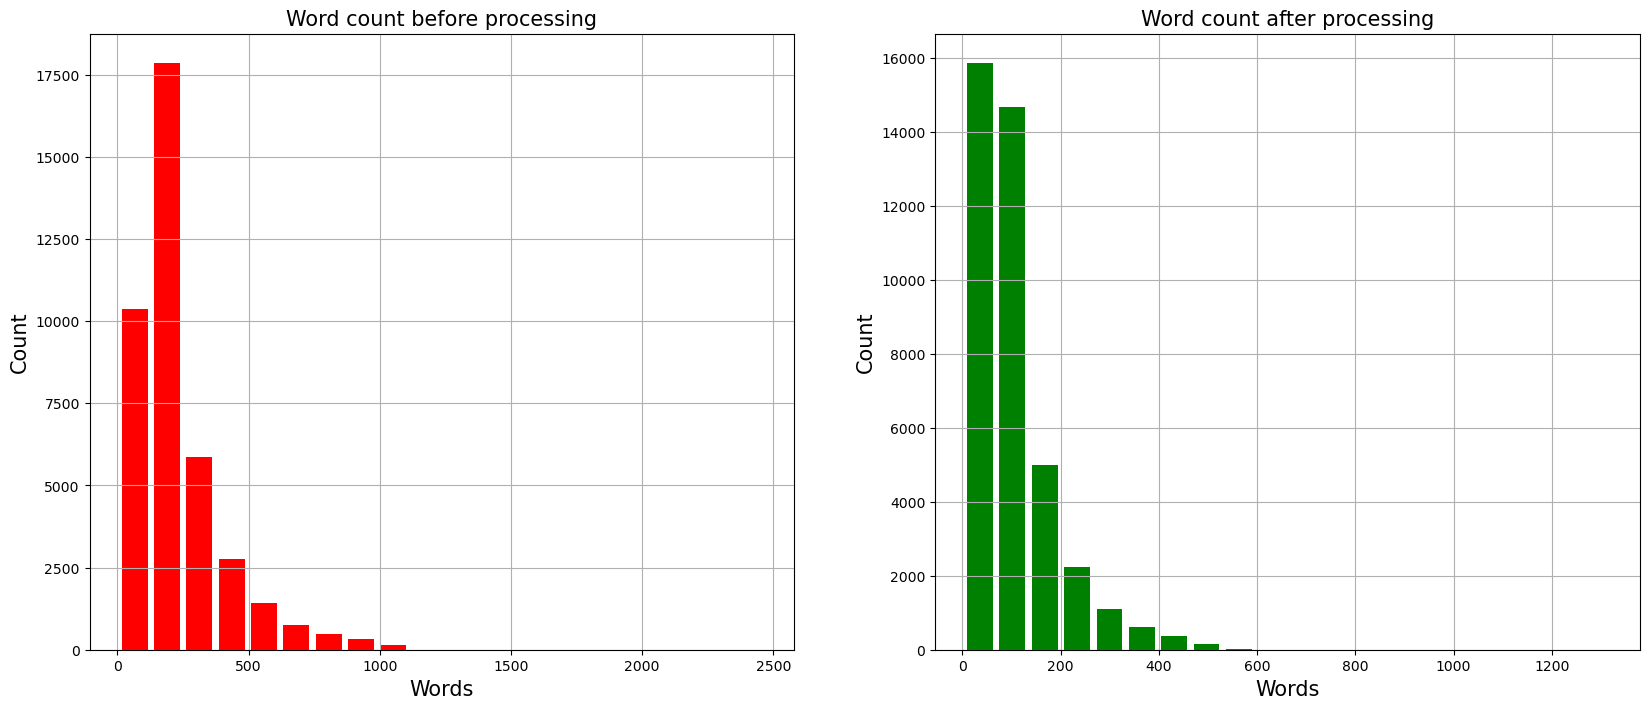

In [20]:
fig,ax = plt.subplots(1,2, figsize=(20,8))
ax[0].hist(X_train_df['word_count_before_processing'],label='Word count before processing',bins=20,color='red',rwidth=0.8)
ax[1].hist(X_train_df['word_count_after_processing'],label='Word count after processing',bins=20,color='green',rwidth=0.8)
ax[0].grid()
ax[0].set_title('Word count before processing', fontsize=15)
ax[0].set_xlabel('Words', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)

ax[1].grid()
ax[1].set_title('Word count after processing', fontsize=15)
ax[1].set_xlabel('Words', fontsize=15)
ax[1].set_ylabel('Count', fontsize=15)
plt.show()

In [21]:
from collections import Counter
count = Counter()
for text in X_train_df['processed_review'].values:
    for word in text.split():
        count[word]+=1

count.most_common(30)

[('movie', 79143),
 ('film', 73295),
 ('not', 53509),
 ('like', 34296),
 ('good', 30802),
 ('do', 27387),
 ('time', 22851),
 ('character', 21964),
 ('watch', 21326),
 ('bad', 20181),
 ('s', 20012),
 ('see', 19385),
 ('story', 19200),
 ('think', 17254),
 ('scene', 16425),
 ('great', 15610),
 ('look', 15254),
 ('know', 14790),
 ('people', 14339),
 ('end', 13856),
 ('go', 13714),
 ('I', 13627),
 ('love', 13389),
 ('way', 13074),
 ('play', 12982),
 ('thing', 12870),
 ('come', 12698),
 ('find', 12426),
 ('act', 11922),
 ('man', 11510)]

In [22]:
frequent_words = pd.DataFrame(count.most_common(50))
frequent_words.columns=['word','count']
frequent_words.head()

,word,count
0,movie,79143
1,film,73295
2,not,53509
3,like,34296
4,good,30802


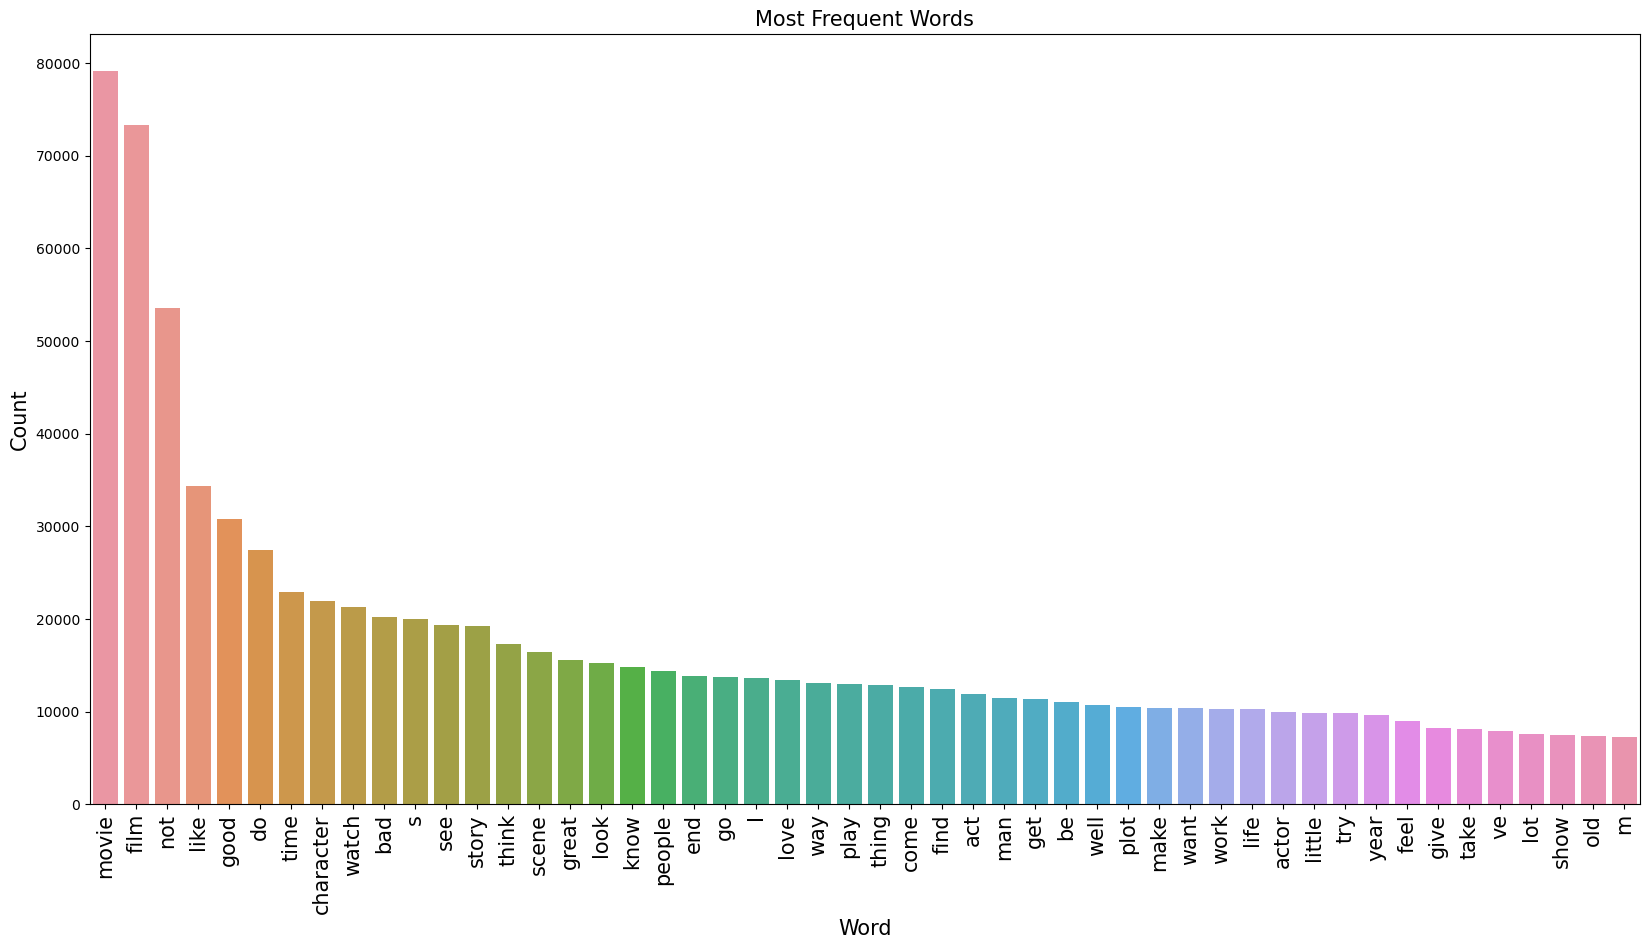

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x=frequent_words['word'],y=frequent_words['count'])
plt.title("Most Frequent Words", fontsize = 15)
plt.xlabel('Word', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation=90, fontsize = 15)
plt.show()

## Word cloud

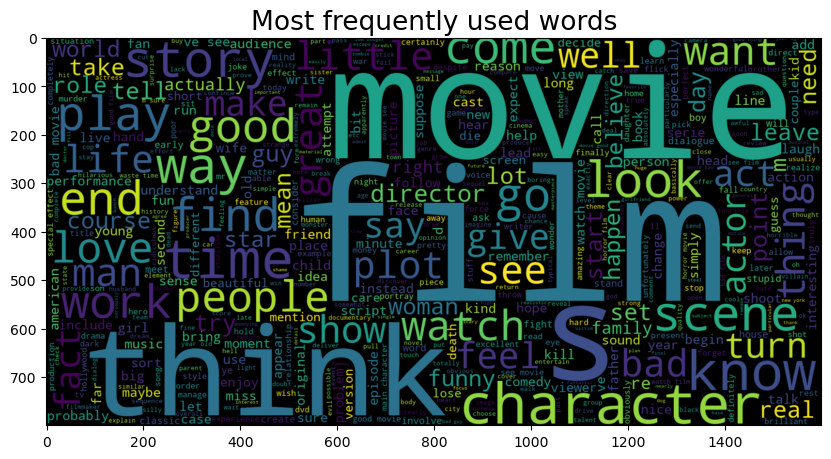

In [24]:
from wordcloud import WordCloud
text = " ".join ([word for word in X_train_df['processed_review']])
plt.figure(figsize=(10,20))
wordcloud = WordCloud(max_words=500, width=1600,height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most frequently used words', fontsize = 19)
plt.show()

## Strategy:

- Vectorize the entire dataset 
- Create clusters(100)
- Label the data points in each cluster by comparing the y_train dataset
    - Data points are labelled with the majority label in each cluster
- Split the dataset for training and validation
- Find optimum number of components to perform dimensionality reduction
- Implement various ML models(with and without PCA to compare performance) 
- Performing GridSearch and CrossValidation on best three algorithms
- Ensembling best three models to check for performance boost

## Vectorizing the dataset

In [25]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X_train_df['processed_review'])

### Trying with 100 clusters

In [26]:
k = 100
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_tfidf)

C:\Users\blahb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=100, random_state=42)

In [27]:
# Labelling data points in each cluster by taking the majority label in that cluster

labels = [None] * k
for i in range(k):
    cluster_indices = kmeans.labels_ == i
    cluster_reviews = X_train_df.loc[cluster_indices, 'processed_review']
    cluster_labels = df_y.loc[cluster_indices, 'sentiment']
    if len(cluster_labels.unique()) == 1:
        labels[i] = cluster_labels.iloc[0]
    else:
        center = kmeans.cluster_centers_[i]
        distances = pairwise_distances_argmin_min(center.reshape(1, -1), X_tfidf[cluster_indices])[1]
        majority_label = cluster_labels.iloc[distances.argmin()]
        labels[i] = majority_label

# Assign the labels to the clusters
X_train_df['cluster'] = kmeans.labels_
X_train_df['label'] = [labels[i] for i in kmeans.labels_]

In [28]:
X = X_train_df['processed_review']
y = X_train_df['label']

## Train-Test Split 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Vectorize

In [30]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_final_tfidf = tfidf_vectorizer.transform(X_final['review'])

## Performing SVD

- SVD is Singular Value Decomposition, which we use as a replacement of PCA, to achieve dimensionality reduction by giving sparse matrix as input

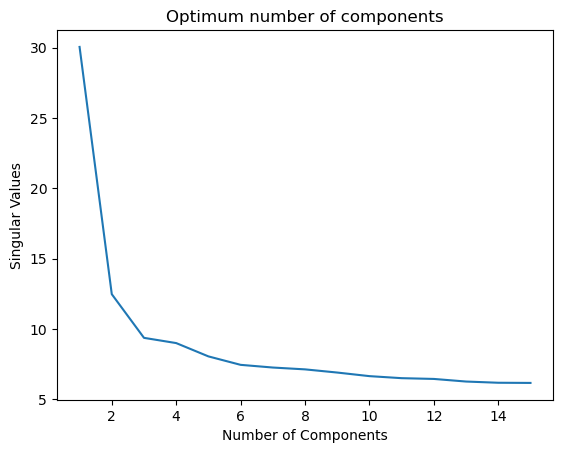

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
# Fit TruncatedSVD on your data
svd = TruncatedSVD(n_components=15)
svd.fit(X_train_tfidf)

# Plot singular values
plt.plot(range(1, len(svd.singular_values_) + 1), svd.singular_values_)
plt.xlabel('Number of Components')
plt.ylabel('Singular Values')
plt.title('Optimum number of components')
plt.show()


8 Components seemt to be a sufficient number of dimensions without too much loss of information

### Performance Tracker

In [32]:
model_perf = {'model':[], 'validation_precision':[], 'production_precision': [], 'training_time_sec': []}

## Logistic Regression

### Training model without PCA

In [33]:
model_name = 'LR wo SVD'


In [34]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model_name = 'LR wo SVD'

lr_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lr', LogisticRegression(random_state=42, max_iter=1000))
])
lr_pipeline.fit(X_train, y_train)


CPU times: total: 17.8 s
Wall time: 5.55 s


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(max_iter=1000, random_state=42))])

#### Validation Score

In [35]:
from sklearn.metrics import classification_report, f1_score
y_pred = lr_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      4137
           1       0.80      0.77      0.79      3863

    accuracy                           0.80      8000
   macro avg       0.80      0.79      0.80      8000
weighted avg       0.80      0.80      0.80      8000



#### Production score

In [36]:
y_final_pred = lr_pipeline.predict(X_final['review'])
print(classification_report(y_final.sentiment, y_final_pred))

              precision    recall  f1-score   support

           0       0.51      0.99      0.67      5000
           1       0.82      0.03      0.07      5000

    accuracy                           0.51     10000
   macro avg       0.66      0.51      0.37     10000
weighted avg       0.66      0.51      0.37     10000



#### Recording Performance

In [38]:
from sklearn.metrics import precision_score
model_perf['model'].append(model_name)
model_perf['validation_precision'].append(np.round(precision_score(y_test, lr_pipeline.predict(X_test)), 2))
model_perf['production_precision'].append(np.round(precision_score(y_final['sentiment'], lr_pipeline.predict(X_final['review'])), 2))
model_perf['training_time_sec'].append(5.76) 

### Model trained with PCA

In [39]:
model_name = 'LR w SVD'


In [40]:
%%time
svd = TruncatedSVD(n_components=8)
model = 'LR w SVD'
text_process_pipe = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('svd', svd)])

lr_pipeline_pca = Pipeline([
    ('text_processor', text_process_pipe),
    ('lr', LogisticRegression(random_state=42, max_iter=1000))
])
lr_pipeline_pca.fit(X_train, y_train)


CPU times: total: 13.6 s
Wall time: 4.84 s


Pipeline(steps=[('text_processor',
                 Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                 ('svd', TruncatedSVD(n_components=8))])),
                ('lr', LogisticRegression(max_iter=1000, random_state=42))])

#### Validation Score

In [41]:
from sklearn.metrics import classification_report, f1_score
y_pred = lr_pipeline_pca.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      4137
           1       0.70      0.67      0.68      3863

    accuracy                           0.70      8000
   macro avg       0.70      0.70      0.70      8000
weighted avg       0.70      0.70      0.70      8000



#### Production score

In [42]:
y_final_pred = lr_pipeline_pca.predict(X_final['review'])
print(classification_report(y_final['sentiment'], y_final_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5000
           1       0.90      0.01      0.02      5000

    accuracy                           0.50     10000
   macro avg       0.70      0.50      0.34     10000
weighted avg       0.70      0.50      0.34     10000



#### Recording Performance

In [43]:
from sklearn.metrics import precision_score
model_perf['model'].append(model_name)
model_perf['validation_precision'].append(np.round(precision_score(y_test, lr_pipeline_pca.predict(X_test)), 2))
model_perf['production_precision'].append(np.round(precision_score(y_final['sentiment'], lr_pipeline_pca.predict(X_final['review'])), 2))
model_perf['training_time_sec'].append(4.95) 

In [44]:
pd.DataFrame(model_perf)

,model,validation_precision,production_precision,training_time_sec
0,LR wo SVD,0.8,0.82,5.76
1,LR w SVD,0.7,0.90,4.95


## Random Forest 

### Without PCA

In [45]:
model_name = 'rf wo SVD'

In [46]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('rf', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)


CPU times: total: 5min 14s
Wall time: 5min 15s


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rf', RandomForestClassifier(random_state=42))])

#### Validation Score

In [47]:
y_pred_rf = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      4137
           1       0.77      0.71      0.74      3863

    accuracy                           0.76      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.76      0.76      0.76      8000



#### Production Score

In [48]:
y_final_pred_rf = rf_pipeline.predict(X_final['review'])
print(classification_report(y_final.sentiment, y_final_pred_rf))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5000
           1       0.87      0.02      0.04      5000

    accuracy                           0.51     10000
   macro avg       0.68      0.51      0.36     10000
weighted avg       0.68      0.51      0.36     10000



#### Recording Performance

In [49]:
from sklearn.metrics import precision_score
model_perf['model'].append(model_name)
model_perf['validation_precision'].append(np.round(precision_score(y_test, rf_pipeline.predict(X_test)), 2))
model_perf['production_precision'].append(np.round(precision_score(y_final['sentiment'], rf_pipeline.predict(X_final['review'])), 2))
model_perf['training_time_sec'].append(325.0) 

### With PCA

In [50]:
model_name = 'rf w SVD'

In [51]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_pipeline_pca = Pipeline([
    ('text_processor', text_process_pipe),
    ('rf', RandomForestClassifier(random_state=42))
])
rf_pipeline_pca.fit(X_train, y_train)


CPU times: total: 27.4 s
Wall time: 18.7 s


Pipeline(steps=[('text_processor',
                 Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                 ('svd', TruncatedSVD(n_components=8))])),
                ('rf', RandomForestClassifier(random_state=42))])

#### Validation Score

In [52]:
y_pred_rf = rf_pipeline_pca.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      4137
           1       0.74      0.69      0.72      3863

    accuracy                           0.73      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.73      0.73      0.73      8000



#### Production Score

In [53]:
y_final_pred_rf = rf_pipeline_pca.predict(X_final['review'])
print(classification_report(y_final.sentiment, y_final_pred_rf))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5000
           1       0.77      0.01      0.03      5000

    accuracy                           0.50     10000
   macro avg       0.64      0.50      0.35     10000
weighted avg       0.64      0.50      0.35     10000



#### Recording Performance

In [54]:
from sklearn.metrics import precision_score
model_perf['model'].append(model_name)
model_perf['validation_precision'].append(np.round(precision_score(y_test, rf_pipeline_pca.predict(X_test)), 2))
model_perf['production_precision'].append(np.round(precision_score(y_final['sentiment'], rf_pipeline_pca.predict(X_final['review'])), 2))
model_perf['training_time_sec'].append(19.2) 

In [55]:
pd.DataFrame(model_perf)

,model,validation_precision,production_precision,training_time_sec
0,LR wo SVD,0.80,0.82,5.76
1,LR w SVD,0.70,0.90,4.95
2,rf wo SVD,0.77,0.87,325.00
3,rf w SVD,0.74,0.77,19.20


## XGBoost

### Without PCA 

In [56]:
model_name = 'xgb wo SVD'

In [57]:
%%time
from xgboost import XGBClassifier

xgb_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('xgb', XGBClassifier(random_state=42))
])
xgb_pipeline.fit(X_train, y_train)

CPU times: total: 2min 41s
Wall time: 24.5 s


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

###### Validation Score

In [58]:
y_pred_xgb = xgb_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      4137
           1       0.85      0.80      0.82      3863

    accuracy                           0.84      8000
   macro avg       0.84      0.83      0.84      8000
weighted avg       0.84      0.84      0.84      8000



###### Production Score

In [59]:
y_final_pred_xgb = xgb_pipeline.predict(X_final['review'])
print(classification_report(y_final.sentiment, y_final_pred_xgb))

              precision    recall  f1-score   support

           0       0.51      0.98      0.67      5000
           1       0.71      0.04      0.07      5000

    accuracy                           0.51     10000
   macro avg       0.61      0.51      0.37     10000
weighted avg       0.61      0.51      0.37     10000



###### Recording Performance

In [60]:
from sklearn.metrics import precision_score
model_perf['model'].append(model_name)
model_perf['validation_precision'].append(np.round(precision_score(y_test, xgb_pipeline.predict(X_test)), 2))
model_perf['production_precision'].append(np.round(precision_score(y_final['sentiment'], xgb_pipeline.predict(X_final['review'])), 2))
model_perf['training_time_sec'].append(24.6) 

In [61]:
pd.DataFrame(model_perf)

,model,validation_precision,production_precision,training_time_sec
0,LR wo SVD,0.80,0.82,5.76
1,LR w SVD,0.70,0.90,4.95
2,rf wo SVD,0.77,0.87,325.00
3,rf w SVD,0.74,0.77,19.20
4,xgb wo SVD,0.85,0.71,24.60


### With PCA 

In [62]:
model_name = 'xgb w SVD'

In [63]:
%%time
from xgboost import XGBClassifier

xgb_pipeline_pca = Pipeline([
    ('text_processor', text_process_pipe),
    ('xgb', XGBClassifier(random_state=42))
])
xgb_pipeline_pca.fit(X_train, y_train)

CPU times: total: 25.5 s
Wall time: 6.24 s


Pipeline(steps=[('text_processor',
                 Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                 ('svd', TruncatedSVD(n_components=8))])),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...one,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

###### Validation Score

In [64]:
y_pred_xgb = xgb_pipeline_pca.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      4137
           1       0.74      0.69      0.71      3863

    accuracy                           0.73      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.73      0.73      0.73      8000



###### Production Score

In [65]:
y_final_pred_xgb = xgb_pipeline_pca.predict(X_final['review'])
print(classification_report(y_final.sentiment, y_final_pred_xgb))

              precision    recall  f1-score   support

           0       0.50      0.99      0.67      5000
           1       0.74      0.02      0.03      5000

    accuracy                           0.51     10000
   macro avg       0.62      0.51      0.35     10000
weighted avg       0.62      0.51      0.35     10000



###### Recording Performance

In [66]:
from sklearn.metrics import precision_score
model_perf['model'].append(model_name)
model_perf['validation_precision'].append(np.round(precision_score(y_test, xgb_pipeline_pca.predict(X_test)), 2))
model_perf['production_precision'].append(np.round(precision_score(y_final['sentiment'], xgb_pipeline_pca.predict(X_final['review'])), 2))
model_perf['training_time_sec'].append(6.35) 

In [67]:
pd.DataFrame(model_perf)

,model,validation_precision,production_precision,training_time_sec
0,LR wo SVD,0.80,0.82,5.76
1,LR w SVD,0.70,0.90,4.95
2,rf wo SVD,0.77,0.87,325.00
3,rf w SVD,0.74,0.77,19.20
4,xgb wo SVD,0.85,0.71,24.60
5,xgb w SVD,0.74,0.74,6.35


## Catboost

### Without PCA

In [68]:
model_name = 'cb wo SVD'

In [69]:
%%time
from catboost import CatBoostClassifier

cb_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('cb', CatBoostClassifier(random_state=42, verbose=False))
])
cb_pipeline.fit(X_train, y_train)

CPU times: total: 1h 15min 39s
Wall time: 12min 4s


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('cb',
                 <catboost.core.CatBoostClassifier object at 0x00000233A767BE20>)])

###### Validation Score

In [70]:
y_pred_cb = cb_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_cb))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4137
           1       0.86      0.82      0.84      3863

    accuracy                           0.85      8000
   macro avg       0.85      0.85      0.85      8000
weighted avg       0.85      0.85      0.85      8000



###### Production Score

In [71]:
y_final_pred_cb = cb_pipeline.predict(X_final['review'])
print(classification_report(y_final.sentiment, y_final_pred_cb))

              precision    recall  f1-score   support

           0       0.50      0.99      0.67      5000
           1       0.69      0.03      0.06      5000

    accuracy                           0.51     10000
   macro avg       0.60      0.51      0.36     10000
weighted avg       0.60      0.51      0.36     10000



###### Recording Performance

In [72]:
from sklearn.metrics import precision_score
model_perf['model'].append(model_name)
model_perf['validation_precision'].append(np.round(precision_score(y_test, cb_pipeline.predict(X_test)), 2))
model_perf['production_precision'].append(np.round(precision_score(y_final['sentiment'], cb_pipeline.predict(X_final['review'])), 2))
model_perf['training_time_sec'].append(723.0)

In [73]:
pd.DataFrame(model_perf)

,model,validation_precision,production_precision,training_time_sec
0,LR wo SVD,0.80,0.82,5.76
1,LR w SVD,0.70,0.90,4.95
2,rf wo SVD,0.77,0.87,325.00
3,rf w SVD,0.74,0.77,19.20
4,xgb wo SVD,0.85,0.71,24.60
5,xgb w SVD,0.74,0.74,6.35
6,cb wo SVD,0.86,0.69,723.00


### With PCA

In [74]:
model_name = 'cb w SVD'

In [75]:
%%time
# Catboost
from catboost import CatBoostClassifier

cb_pipeline_pca = Pipeline([
    ('text_processor', text_process_pipe),
    ('cb', CatBoostClassifier(random_state=42, verbose=False))
])
cb_pipeline_pca.fit(X_train, y_train)

CPU times: total: 22.5 s
Wall time: 33.6 s


Pipeline(steps=[('text_processor',
                 Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                 ('svd', TruncatedSVD(n_components=8))])),
                ('cb',
                 <catboost.core.CatBoostClassifier object at 0x00000233C79624C0>)])

#### Validation Score

In [76]:
y_pred_cb = cb_pipeline_pca.predict(X_test)
print(classification_report(y_test, y_pred_cb))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      4137
           1       0.74      0.69      0.72      3863

    accuracy                           0.74      8000
   macro avg       0.74      0.73      0.73      8000
weighted avg       0.74      0.74      0.74      8000



#### Production Score

In [77]:
#testing for final data
y_final_pred_cb = cb_pipeline_pca.predict(X_final['review'])
print(classification_report(y_final.sentiment, y_final_pred_cb))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5000
           1       0.82      0.02      0.03      5000

    accuracy                           0.51     10000
   macro avg       0.66      0.51      0.35     10000
weighted avg       0.66      0.51      0.35     10000



#### Recording Performance

In [78]:
from sklearn.metrics import precision_score
model_perf['model'].append(model_name)
model_perf['validation_precision'].append(np.round(precision_score(y_test, cb_pipeline_pca.predict(X_test)), 2))
model_perf['production_precision'].append(np.round(precision_score(y_final['sentiment'], cb_pipeline_pca.predict(X_final['review'])), 2))
model_perf['training_time_sec'].append(29.1)

In [79]:
pd.DataFrame(model_perf)

,model,validation_precision,production_precision,training_time_sec
0,LR wo SVD,0.80,0.82,5.76
1,LR w SVD,0.70,0.90,4.95
2,rf wo SVD,0.77,0.87,325.00
3,rf w SVD,0.74,0.77,19.20
4,xgb wo SVD,0.85,0.71,24.60
5,xgb w SVD,0.74,0.74,6.35
6,cb wo SVD,0.86,0.69,723.00
7,cb w SVD,0.74,0.82,29.10


## Grid Search CV

In [80]:
# Grid search cv

lr_params = {
    'C': [10**-1, 1, 10, 100],
}

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'gamma': [0.2, 0.3],
}

catboost_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'eval_metric': ['Precision'],
}


In [81]:
# Process the input data for GridSearch
X_train_processed = text_process_pipe.fit_transform(X_train)
X_test_processed = text_process_pipe.transform(X_test)
X_final_processed = text_process_pipe.transform(X_final['review'])


In [82]:
from sklearn.model_selection import GridSearchCV

# Create the grid search objects
lr_grid = GridSearchCV(lr_pipeline_pca.named_steps['lr'], lr_params, scoring='precision', cv=3)
xgb_grid = GridSearchCV(xgb_pipeline_pca.named_steps['xgb'], xgb_params, scoring='precision', cv=3)
cb_grid = GridSearchCV(cb_pipeline_pca.named_steps['cb'], catboost_params, scoring='precision', cv=3)



### Logistic Regression

In [83]:
model_name = 'lr_grid'


In [84]:
%%time
# Fit the grid search objects
lr_grid.fit(X_train_processed, y_train)

# Print the best parameters and scores
print('Logistic Regression:')
print(lr_grid.best_params_, lr_grid.best_score_)


Logistic Regression:
{'C': 0.1} 0.7199353714296176
CPU times: total: 500 ms
Wall time: 518 ms


#### Validation Score

In [85]:
y_test_pred = lr_grid.predict(X_test_processed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      4137
           1       0.71      0.65      0.68      3863

    accuracy                           0.70      8000
   macro avg       0.70      0.70      0.70      8000
weighted avg       0.70      0.70      0.70      8000



#### Production Score

In [86]:
y_test_pred_final = lr_grid.predict(X_final_processed)
print(classification_report(y_final['sentiment'], y_test_pred_final))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5000
           1       0.88      0.01      0.02      5000

    accuracy                           0.50     10000
   macro avg       0.69      0.50      0.35     10000
weighted avg       0.69      0.50      0.35     10000



#### Recording Performance

In [87]:
from sklearn.metrics import precision_score
model_perf['model'].append(model_name)
model_perf['validation_precision'].append(np.round(precision_score(y_test, y_test_pred), 2))
model_perf['production_precision'].append(np.round(precision_score(y_final['sentiment'], y_test_pred_final), 2))
model_perf['training_time_sec'].append(0.5)

### XGBoost

In [88]:
model_name = 'xgb_grid'

In [89]:
%%time
xgb_grid.fit(X_train_processed, y_train)
print('XGBoost:')
print(xgb_grid.best_params_, xgb_grid.best_score_) 

XGBoost:
{'gamma': 0.2, 'max_depth': 5, 'n_estimators': 100} 0.7518840678200037
CPU times: total: 4min 24s
Wall time: 38.4 s


#### Validation Score

In [90]:
y_test_pred = xgb_grid.predict(X_test_processed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      4137
           1       0.74      0.68      0.71      3863

    accuracy                           0.73      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.73      0.73      0.73      8000



#### Production Score

In [91]:
y_test_pred_final = xgb_grid.predict(X_final_processed)
print(classification_report(y_final['sentiment'], y_test_pred_final))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5000
           1       0.89      0.02      0.03      5000

    accuracy                           0.51     10000
   macro avg       0.70      0.51      0.35     10000
weighted avg       0.70      0.51      0.35     10000



#### Recording Performance

In [92]:
from sklearn.metrics import precision_score
model_perf['model'].append(model_name)
model_perf['validation_precision'].append(np.round(precision_score(y_test, y_test_pred), 2))
model_perf['production_precision'].append(np.round(precision_score(y_final['sentiment'], y_test_pred_final), 2))
model_perf['training_time_sec'].append(38.1)

### CatBoost

In [93]:
model_name = 'cb_grid'


In [94]:
%%time
cb_grid.fit(X_train_processed, y_train)

print('CatBoost:')
print(cb_grid.best_params_, cb_grid.best_score_)


CatBoost:
{'eval_metric': 'Precision', 'max_depth': 5, 'n_estimators': 300} 0.7588111213854654
CPU times: total: 39.3 s
Wall time: 2min 6s


#### Validation Score

In [95]:
y_test_pred = cb_grid.predict(X_test_processed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      4137
           1       0.74      0.70      0.72      3863

    accuracy                           0.74      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.74      0.74      0.74      8000



#### Production Score

In [96]:
y_test_pred_final = cb_grid.predict(X_final_processed)
print(classification_report(y_final['sentiment'], y_test_pred_final))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5000
           1       0.93      0.02      0.03      5000

    accuracy                           0.51     10000
   macro avg       0.72      0.51      0.35     10000
weighted avg       0.72      0.51      0.35     10000



#### Recording Performance

In [97]:
from sklearn.metrics import precision_score
model_perf['model'].append(model_name)
model_perf['validation_precision'].append(np.round(precision_score(y_test, y_test_pred), 2))
model_perf['production_precision'].append(np.round(precision_score(y_final['sentiment'], y_test_pred_final), 2))
model_perf['training_time_sec'].append(100)

Taking the best models from Grid Search

## Ensembling logistic regression, catboost and xgboost

In [104]:
model_name = 'ensemble'

In [98]:
%%time
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('lr', lr_grid),
    ('xgb', xgb_grid), 
    ('cb', cb_grid)], 
    voting='soft')

ensemble.fit(X_train_processed, y_train)

CPU times: total: 5min 19s
Wall time: 2min 47s


VotingClassifier(estimators=[('lr',
                              GridSearchCV(cv=3,
                                           estimator=LogisticRegression(max_iter=1000,
                                                                        random_state=42),
                                           param_grid={'C': [0.1, 1, 10, 100]},
                                           scoring='precision')),
                             ('xgb',
                              GridSearchCV(cv=3,
                                           estimator=XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   early_stopping_rounds=N...
                                                                   predictor=None,
                                                                   random_state=42, ...),
                                           param_grid={'gamma': [0.2, 0.3],
                                                       'max_depth': [3, 4, 5],
                                                       'n_estimators': [100,
                                                                        200]},
                                           scoring='precision')),
                             ('cb',
                              GridSearchCV(cv=3,
                                           estimator=<catboost.core.CatBoostClassifier object at 0x00000233C79624C0>,
                                           param_grid={'eval_metric': ['Precision'],
                                                       'max_depth': [3, 4, 5],
                                                       'n_estimators': [100,
                                                                        200,
                                                                        300]},
                                           scoring='precision'))],
                 voting='soft')

In [99]:
# testing for test data
y_pred_ensemble = ensemble.predict(X_test_processed)
print(classification_report(y_test, y_pred_ensemble))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      4137
           1       0.75      0.70      0.72      3863

    accuracy                           0.74      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.74      0.74      0.74      8000



In [100]:
#testing for final data
y_final_pred_ensemble = ensemble.predict(X_final_processed)
print(classification_report(y_final['sentiment'], y_final_pred_ensemble))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5000
           1       0.94      0.01      0.02      5000

    accuracy                           0.51     10000
   macro avg       0.72      0.51      0.35     10000
weighted avg       0.72      0.51      0.35     10000



#### Recording Performance

In [101]:
from sklearn.metrics import precision_score
model_perf['model'].append(model_name)
model_perf['validation_precision'].append(np.round(precision_score(y_test, y_pred_ensemble), 2))
model_perf['production_precision'].append(np.round(precision_score(y_final['sentiment'], y_final_pred_ensemble), 2))
model_perf['training_time_sec'].append(138)

In [108]:
model_perf = pd.DataFrame(model_perf)

In [109]:
model_perf

,model,validation_precision,production_precision,training_time_sec
0,LR wo SVD,0.80,0.82,5.76
1,LR w SVD,0.70,0.90,4.95
2,rf wo SVD,0.77,0.87,325.00
3,rf w SVD,0.74,0.77,19.20
4,xgb wo SVD,0.85,0.71,24.60
5,xgb w SVD,0.74,0.74,6.35
6,cb wo SVD,0.86,0.69,723.00
7,cb w SVD,0.74,0.82,29.10
8,lr_grid,0.71,0.88,0.50
9,xgb_grid,0.74,0.89,38.10


In [112]:
# Most precise model
model_perf.loc[model_perf['production_precision'] == model_perf['production_precision'].max()]

,model,validation_precision,production_precision,training_time_sec
11,ensemble,0.75,0.94,138.0


In [113]:
# Fastest trained model
model_perf.loc[model_perf['training_time_sec'] == model_perf['training_time_sec'].min()]

,model,validation_precision,production_precision,training_time_sec
8,lr_grid,0.71,0.88,0.5


# Challenges
1. Finding optimum number of clusters was time taking. 
1. Cluster labelling required some creative thought.
1. Tracking model performance for selecting best model.

# Summary
1. According to the use case "Precision" is the metric to be optimized for. We want to only show positive reviews on the website. So we need a high Precision model.
1. Dimentionality reduction with SVD was useful to cut down on training time without comprimising model precision.
1. If Precision is the most important metric for model selection then `Ensemble` model is the best choice.
1. If faster training is the priority then `Logistic Regression Grid` was the best.